**Grocery store analysis**

In [39]:
!pip install openpyxl

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.weightstats import ztest

**Reading and exploring the dataset**

In [41]:
df = pd.read_excel('Grocery Database.xlsx')

In [42]:
def exploring_dataset(dataframe):
    display(dataframe.head())
    display(dataframe.tail())
    print(dataframe.info())
    print(dataframe.isnull().sum().sort_values(ascending=False))
    
    
exploring_dataset(df)

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,...,0.1,13.32408,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,...,0.1,25.26480,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693
3,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760
4,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,2,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930


,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
50442,GSW01533,2019-12-28,2019,12,20:59:27.302000,9893317658,MIDSG0630,21,28,Female,...,0.07,79.358048,Card,Philippine National bank,0.141,0.15,0.709,0.87420,0.9300,4.39580
50443,GSW01534,2019-12-29,2019,12,13:14:45.030000,9809301701,MIDSG0293,41,28,Female,...,0.07,11.292352,Wallet,Philippine National bank,0.068,0.15,0.782,0.73984,1.6320,8.50816
50444,GSW01535,2019-12-30,2019,12,10:01:32.657000,9840124138,MIDSG0150,41,62,Female,...,0.07,14.999688,Card,BDO Unibank,0.109,0.15,0.741,0.43273,0.5955,2.94177
50445,GSW01535,2019-12-30,2019,12,10:01:32.657000,9840124138,MIDSG0150,41,62,Female,...,0.07,14.999688,Card,BDO Unibank,0.148,0.15,0.702,0.60680,0.6150,2.87820
50446,GSW01535,2019-12-30,2019,12,10:01:32.657000,9840124138,MIDSG0150,42,62,Female,...,0.07,14.999688,Card,BDO Unibank,0.107,0.15,0.743,0.65163,0.9135,4.52487


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50447 entries, 0 to 50446
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Receipt Number       50447 non-null  object        
 1   Date                 50447 non-null  datetime64[ns]
 2   Year                 50447 non-null  int64         
 3   Month                50447 non-null  int64         
 4   Time                 50447 non-null  object        
 5   Mobile Number        50447 non-null  int64         
 6   Membership ID        50447 non-null  object        
 7   Loyalty Card Points  50447 non-null  int64         
 8   Age                  50447 non-null  int64         
 9   Gender               50447 non-null  object        
 10  City                 50447 non-null  object        
 11  Country              50447 non-null  object        
 12  Category             50447 non-null  object        
 13  Sub_Category         50447 non-

There are no missing values.

Change the data type of some columns, for example, Year, Month to int64

In [43]:
df = df.astype({'Year': 'int64', 'Month': 'int64', 'Loyalty Card Points' : 'int64', 'Age' : 'int64', 'QTY' : 'int64'})

Сhange the column display

In [44]:
df.columns = df.columns.str.lower().str.replace(' ','_')

Сheck for duplicates

In [45]:
df[df.duplicated()]

,receipt_number,date,year,month,time,mobile_number,membership_id,loyalty_card_points,age,gender,...,gst,gross_bill_amount,payment_mode,bank_name,%_profit_margin,%_operating_cost,%_product_cost,profit_margin,operating_cost,product_cost
32664,GSB00094,2016-02-12,2016,2,14:01:00.088000,9853108031,MIDSG0091,2,60,Female,...,0.07,8.41662,Cash,ING Bank,0.093,0.15,0.757,0.38502,0.621,3.13398


In [46]:
df[df['receipt_number'] == "GSB00094"].amount.sum() == df.loc[df['receipt_number'] == "GSB00094", 'net_bill_amount']

32663    True
32664    True
Name: net_bill_amount, dtype: bool

The Net Bill Amount is calculated for 2 products. So we do not count it as a duplicate and do not delete it. 

In [47]:
for column in ['year', 'gender', 'category', 'sub_category', 'payment_mode', 'bank_name', 'country', 'city' ]:
    unique_values = sorted(df[column].unique())
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()

Unique values in 'year':
[2016, 2017, 2018, 2019]

Unique values in 'gender':
['Female', 'Male']

Unique values in 'category':
['Bakery & Breakfast', 'Beauty', 'Beverages', 'Choco, Snacks, Sweets', 'Dairy, Chilled & Eggs', 'Frozen', 'Fruit & Vegetable', 'Health', 'Household', 'Kitchen & Dining', 'Meat & Seafood', 'Mother & Baby', 'Party Supplies', 'Pet Care', 'Rice & Cooking Essentials', 'Wines, Beers & Spirits']

Unique values in 'sub_category':
['Adult Diapers & Incontinence', 'Air Care', 'BBQ Supplies', 'Baby & Toddler Food', 'Baby Laundry & Cleaning', 'Baby Toiletries', 'Baby Wipes', 'Bath & Body', 'Beer', 'Berries', 'Biscuits & Crackers', 'Bread & Pasteries', 'Butter & Margarine', 'Cat Food & Treat', 'Cereal & Protein Bars', 'Champagne & Spakling Wine', 'Chilled Juices & Drinks', 'Chocolate, Malt & Hot Cereals', 'Cider', 'Cleaning Supplies', 'Deli & Cooked Meat', 'Dishwashing', 'Disposable Tableware', 'Dog Food & Trat', 'Eggs', 'Feeding & Nursing', 'Fresh Bread', 'Fresh Fruit', 'F

**1)Profit dynamics by year**

In [48]:
profit_by_country = df.pivot_table(index = 'year', columns = 'country', values = 'profit_margin', aggfunc = 'sum')
profit_by_country

country,Indonesia,Malaysia,Philippines,Singapore
year,,,,
2016,2395.58095,2558.09853,2621.04384,4746.33830
2017,2600.09893,2863.73544,3221.41375,5034.04354
2018,2812.78110,3400.27354,3852.59818,5724.53548
2019,3260.13414,4136.00783,4760.57769,6633.97651


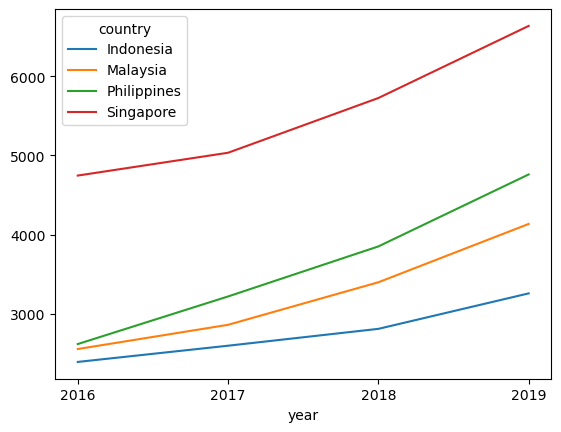

In [49]:
profit_by_country.plot()
plt.xticks(np.arange(2016, 2020));

The profit is increasing every year, the highest profit in Singapore.

**2)Dynamics of visits across different countries over the years 2016 to 2019**

In [50]:
df_unique_transactions = df.drop_duplicates(subset=["receipt_number"], keep=False) 

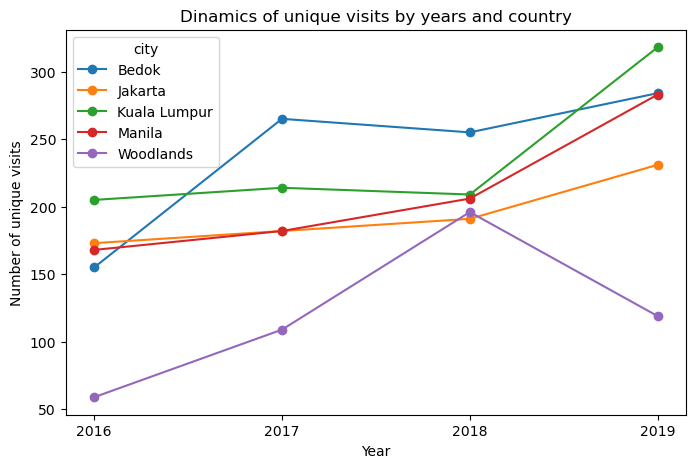

In [51]:
df_unique_transactions.pivot_table(
    index='year', columns='city', values='receipt_number', aggfunc='count').plot(figsize=(8, 5), marker='o')
plt.xticks(np.arange(2016, 2020))
plt.title('Dinamics of unique visits by years and country')
plt.xlabel('Year')
plt.ylabel('Number of unique visits');

**3)How many customers make purchases in the chain of stores from 2016 to 2020?** 

In [52]:
customers = df['membership_id'].unique()
print(f'{len(customers)} - the number of customers in the store network')

2601 - the number of customers in the store network


**4)How many new customers have been added to the network each year?**

In [53]:
customers_2016 = df[df['year'] == 2016]['membership_id'].nunique()
active_memberships = set(df[df['year'] == 2016]['membership_id'])

new_customers_counts = {}

for year in [2017, 2018, 2019]:
    df_year = df[df['year'] == year]
    df_year = df_year[~df_year['membership_id'].isin(active_memberships)]
    new_customers_counts[year] = df_year['membership_id'].nunique()
    active_memberships.update(df_year['membership_id'])
    
print(f"Number of customers in 2016: {customers_2016}")
for year, count in new_customers_counts.items():
    print(f"New customers in {year}: {count}")

Number of customers in 2016: 1466
New customers in 2017: 634
New customers in 2018: 289
New customers in 2019: 212


We see that there are fewer and fewer new customers in the chain of stores

**5)Business profitability by city and month for 2019. Each cell in the heatmap represents the total sales amount for a specific city and month combination for 2019**

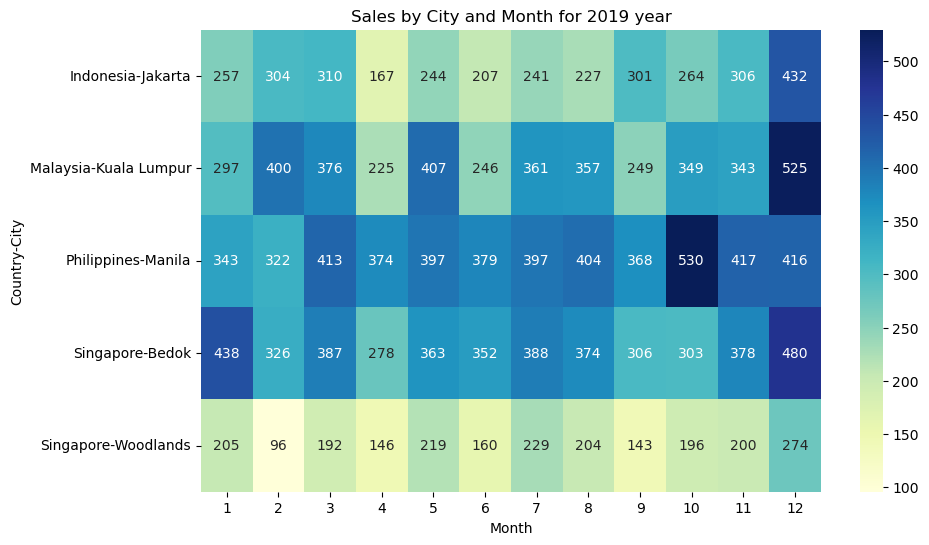

In [54]:
data_2019 = df[df['year'] == 2019]
sales_by_city_month = data_2019.groupby(['country', 'city', 'month'])['profit_margin'].sum().unstack()


plt.figure(figsize=(10, 6))
sns.heatmap(sales_by_city_month, annot=True, fmt=".0f",cmap='YlGnBu')
plt.title('Sales by City and Month for 2019 year')
plt.xlabel('Month')
plt.ylabel('Country-City')
plt.show();

As we can see, the most profitable month is 12.

**6)The percentage of each categorys profit from the total profit**

In [55]:
total_profit = df['profit_margin'].sum()

category_profit = df.groupby('category')['profit_margin'].sum()

category_profit_percentage = (category_profit / total_profit) * 100

print(category_profit_percentage.sort_values(ascending=False))

category
Frozen                       15.277020
Beauty                       13.180122
Bakery & Breakfast           10.268219
Pet Care                      7.365818
Fruit & Vegetable             7.238684
Mother & Baby                 7.030114
Meat & Seafood                6.873219
Wines, Beers & Spirits        6.027115
Choco, Snacks, Sweets         4.879571
Dairy, Chilled & Eggs         4.402316
Beverages                     3.974217
Household                     3.081969
Health                        2.928815
Party Supplies                2.724735
Kitchen & Dining              2.658551
Rice & Cooking Essentials     2.089516
Name: profit_margin, dtype: float64


**7)Whether there is a statistically significant difference between the profits made from Bakery & Breakfast and Beauty?**

In [56]:
pivot_bakery = df[df.category == 'Bakery & Breakfast'].pivot_table(index = 'receipt_number', 
                                                                    values = 'profit_margin', 
                                                                    aggfunc = 'sum')

In [57]:
bakery = pivot_bakery.to_numpy()

In [58]:
pivot_beauty = df[df.category == 'Beauty'].pivot_table(index = 'receipt_number', values = 'profit_margin', aggfunc = 'sum' )

In [59]:
beauty = pivot_beauty.to_numpy()

In [60]:
ztest_results = ztest(bakery, beauty, value = 0)
if (ztest_results[1] < 0.05):
    print('Відхиляємо гіпотезу Н0. Прибуток суттєво відрізняється')
else:
    print('Не можемо відхилити гіпотезу Н0. Прибуток не відрізняється.')

Відхиляємо гіпотезу Н0. Прибуток суттєво відрізняється


**8)Which age group buys the most?**

Age distribution

In [61]:
age_stats = df['age'].describe()
age_stats

count    50447.000000
mean        35.801772
std         14.020367
min         15.000000
25%         23.000000
50%         35.000000
75%         47.000000
max         75.000000
Name: age, dtype: float64

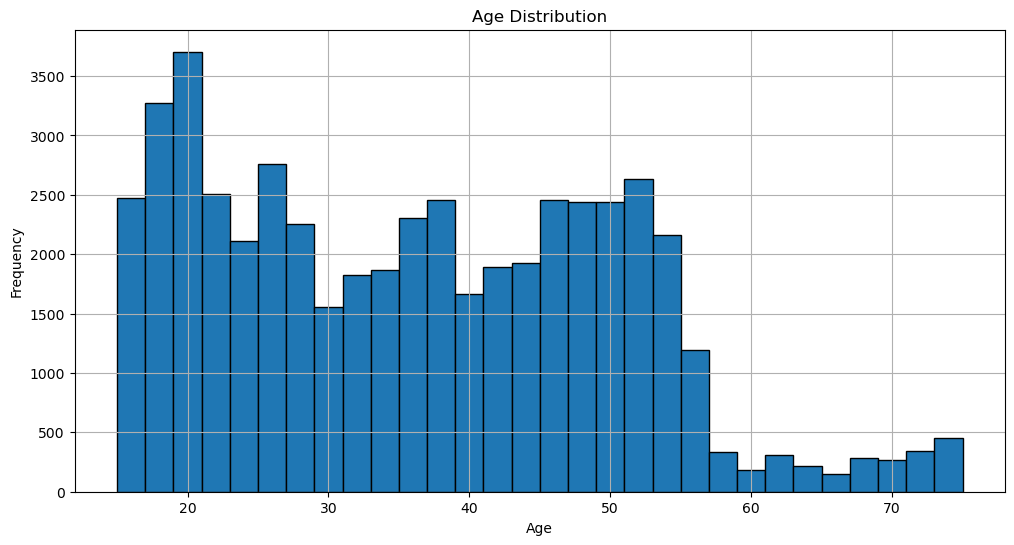

In [62]:
plt.figure(figsize=(12, 6))
df['age'].plot(kind='hist',bins=30, grid=True, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age');

As we can see most purchases are made between the ages of 17-21

In [63]:
young_customers_df = df_unique_transactions[(df_unique_transactions['age'] >= 17) & (df_unique_transactions['age'] <= 21)]
young_customers_df.columns

Index(['receipt_number', 'date', 'year', 'month', 'time', 'mobile_number',
       'membership_id', 'loyalty_card_points', 'age', 'gender', 'city',
       'country', 'category', 'sub_category', 'items', 'brand_',
       'description_', 'price', 'qty', 'disc', 'amount', 'net_bill_amount',
       'gst', 'gross_bill_amount', 'payment_mode', 'bank_name',
       '%_profit_margin', '%_operating_cost', '%_product_cost',
       'profit_margin', 'operating_cost', 'product_cost'],
      dtype='object')

**9)The most popular categories among 17-21**

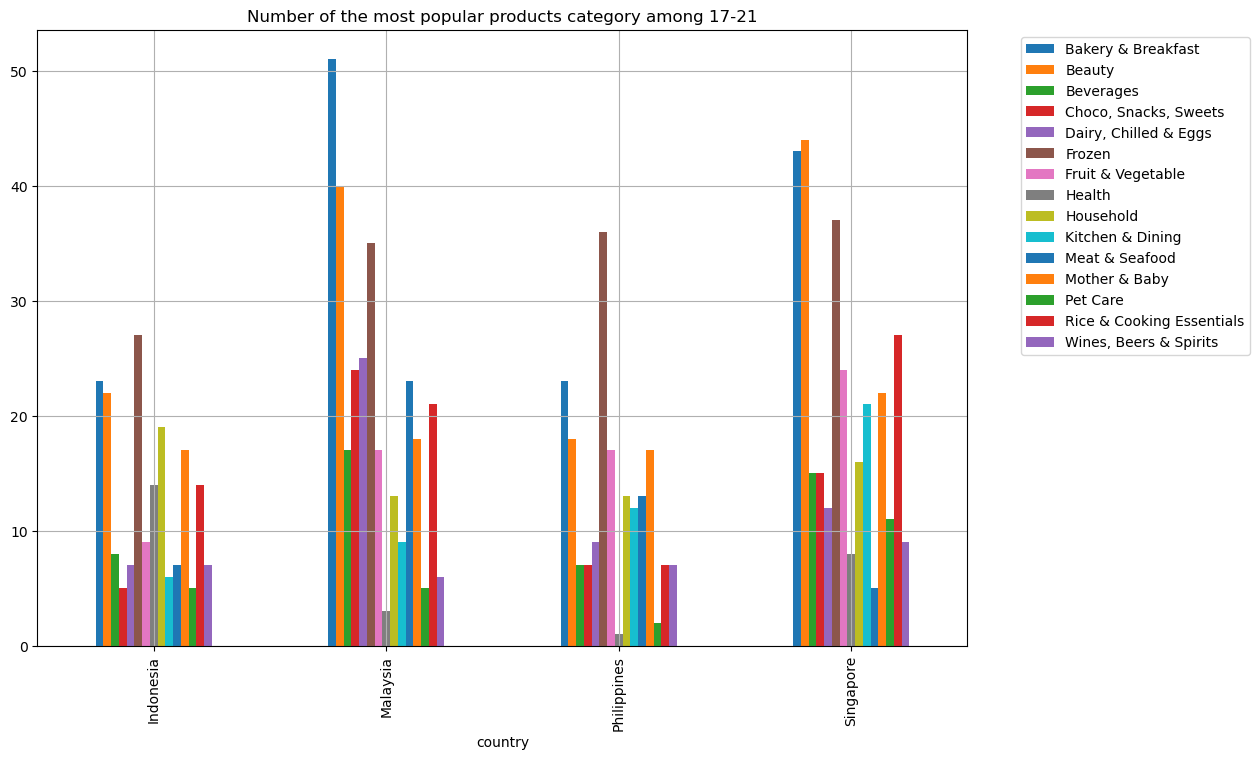

In [64]:
pd.pivot_table(young_customers_df, index='country', columns='category', values='qty', 
               aggfunc='sum', fill_value=0).plot(figsize=(12, 8), kind='bar')

plt.title('Number of the most popular products category among 17-21')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.show();

The most popular product categories are Bakery & Breakfast, Frozen and Beauty

**10)Are women or men more likely to buy between the ages of 17-21?**

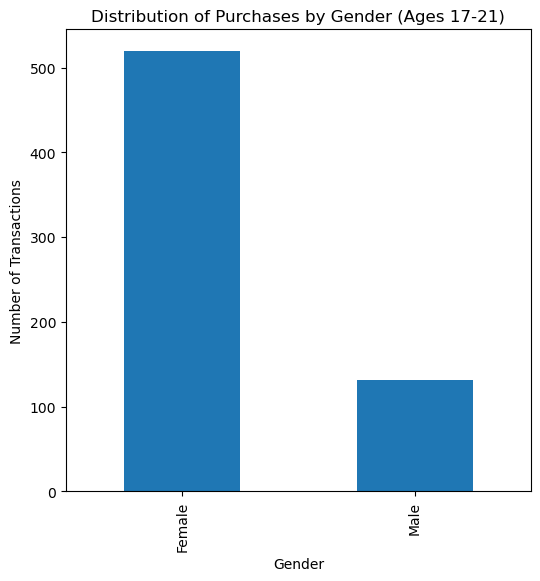

In [65]:
gender_purchases = young_customers_df['gender'].value_counts()

plt.figure(figsize=(6, 6))
gender_purchases.plot(kind='bar')
plt.title('Distribution of Purchases by Gender (Ages 17-21)')
plt.xlabel('Gender')
plt.ylabel('Number of Transactions')
plt.show();

In the given dataset, I can observe most of the customers are from "Singapore". So, you can filter data for Singapore customer.

In [66]:
sing_data=df[df.country == 'Singapore']

In [67]:
sing_data=sing_data[['membership_id','date','receipt_number','qty','net_bill_amount']]

sing_data_group=sing_data.groupby('membership_id').agg({'date': lambda date: (date.max() - date.min()).days,
                                        'receipt_number': lambda num: len(num),
                                        'qty': lambda quant: quant.sum(),
                                        'net_bill_amount': lambda price: price.sum()})

In [68]:
sing_data_group.head()

,date,receipt_number,qty,net_bill_amount
membership_id,,,,
MIDSG0001,1081,36,57,3314.4210
MIDSG0002,1372,25,36,1051.9840
MIDSG0003,0,8,8,378.6208
MIDSG0004,1290,40,78,4755.4430
MIDSG0005,1367,12,23,1452.9036


In [69]:
sing_data_group.columns=['num_days','num_transactions','num_units','spent_money']
sing_data_group.head()

,num_days,num_transactions,num_units,spent_money
membership_id,,,,
MIDSG0001,1081,36,57,3314.4210
MIDSG0002,1372,25,36,1051.9840
MIDSG0003,0,8,8,378.6208
MIDSG0004,1290,40,78,4755.4430
MIDSG0005,1367,12,23,1452.9036


In [70]:
# Average Order Value
sing_data_group['avg_order_value']=sing_data_group['spent_money']/sing_data_group['num_transactions']

In [71]:
purchase_frequency=sum(sing_data_group['num_transactions'])/sing_data_group.shape[0]

In [72]:
# Repeat Rate
repeat_rate=sing_data_group[sing_data_group.num_transactions > 1].shape[0]/sing_data_group.shape[0]

#Churn Rate
churn_rate=1-repeat_rate

In [73]:
# Profit Margin
sing_data_group['profit_margin']=sing_data_group['spent_money']*0.05

In [74]:
# Customer Value
sing_data_group['CLV']=(sing_data_group['avg_order_value']*purchase_frequency)/churn_rate

#Customer Lifetime Value
sing_data_group['cust_lifetime_value']=sing_data_group['CLV']*sing_data_group['profit_margin']


In [75]:
sing_data_group.head()

,num_days,num_transactions,num_units,spent_money,avg_order_value,profit_margin,CLV,cust_lifetime_value
membership_id,,,,,,,,
MIDSG0001,1081,36,57,3314.4210,92.067250,165.72105,11881.245965,1.968973e+06
MIDSG0002,1372,25,36,1051.9840,42.079360,52.59920,5430.326486,2.856308e+05
MIDSG0003,0,8,8,378.6208,47.327600,18.93104,6107.609997,1.156234e+05
MIDSG0004,1290,40,78,4755.4430,118.886075,237.77215,15342.205821,3.647949e+06
MIDSG0005,1367,12,23,1452.9036,121.075300,72.64518,15624.724530,1.135061e+06
